# BY: Mohamed Ashraf Gaber

## The Data.

#### This data is for markets. It contains the markets' sales. The columns: The Product name, its price, The time for each order and the address.

## Importing libraries I will need.

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

### The data contains 12 files for each month, so first I'll concat them all in one single file.

In [2]:
path = 'Sales_Data'  # The path of the files.

# Getting the data files and ignoring the hidden files.
data_files = [file for file in os.listdir(path) if not file.startswith('.')]

all_data = pd.DataFrame()  # This data frame will contain all data.

# Looping for each file
for file in data_files:
    df_small = pd.read_csv(f'./{path}/{file}')  # Reading the file.
    
    all_data = pd.concat([all_data, df_small], axis=0)  # Concat this file with the big one.

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Exporting the final data to CSV file.

In [4]:
all_data.to_csv('./Final_Data/final_data.csv', index=False)

## Importing the data.

In [5]:
df = pd.read_csv('./Final_Data/final_data.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Some exploratory data analysis and data visualization.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Checking for null values.

In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Visualizing the null values.

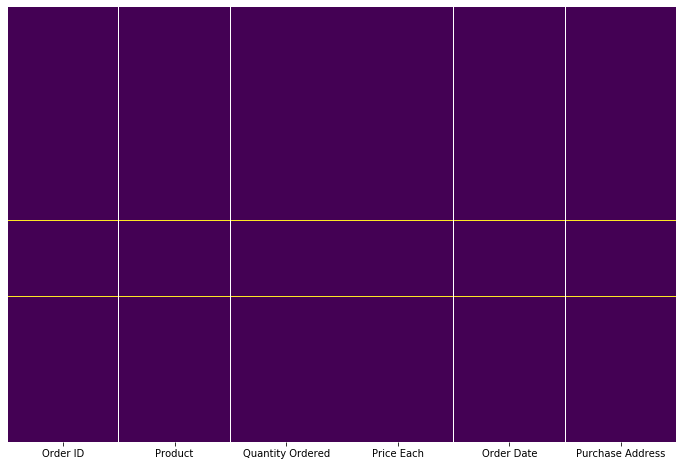

In [9]:
plt.figure(figsize=(12, 8));

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis');

#### Dropping the null values.

In [10]:
df.dropna(inplace=True)

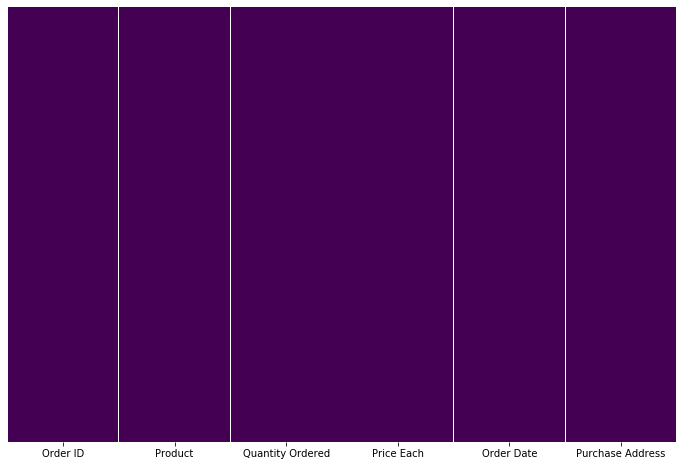

In [11]:
plt.figure(figsize=(12, 8));

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis');

In [12]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Printing some duplicates rows that I'll drop from the data.

In [13]:
df[df['Order Date'].str[:] != 'Order Date'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
df = df[df['Order Date'].str[:] != 'Order Date']

df[df['Order Date'].str[:] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Converting the Order Data column to datetime type instead of object.

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


### Creating some columns which will help me in the Analysis

In [16]:
df['month'] = df['Order Date'].dt.month  # Creating a column for the month.
df['hour'] = df['Order Date'].dt.hour  # Creating a column for the hour.

num_cols = ['Order ID', 'Quantity Ordered', 'Price Each']

# Converting the num_cols to numeric instead of object.
for col in num_cols:
    df[col] = pd.to_numeric(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 12.8+ MB


In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9


### Creating a column for the final price.

In [18]:
df['final_price'] = df.apply(lambda x: x['Quantity Ordered'] * x['Price Each'], axis=1)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,final_price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99


### Creating a column for City.

In [19]:
def get_city_state(address):
    city = address.split(', ')[1]
    state = address.split(', ')[2][:2]
    
    return city + ', ' + state

df['city'] = df['Purchase Address'].apply(get_city_state)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,final_price,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,"Los Angeles, CA"


### Creating some helpers functions that will help me in visualization.

In [20]:
def create_bar(x, height, xlabel, ylabel, title, ticks=None, rotation=None):
    plt.figure(figsize=(12, 8));

    plt.bar(x=x, height=height);

    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

    plt.xticks(ticks=ticks, rotation=rotation);
    
def create_plot(x, y, xlabel, ylabel, title, ticks=None, rotation=None):
    plt.figure(figsize=(12, 8));

    plt.plot(x, y);

    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

    plt.xticks(ticks=ticks, rotation=rotation);

## Question 1: What was the best month for sales?

In [21]:
month_sales = df.groupby('month').sum()['final_price']

month_sales

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: final_price, dtype: float64

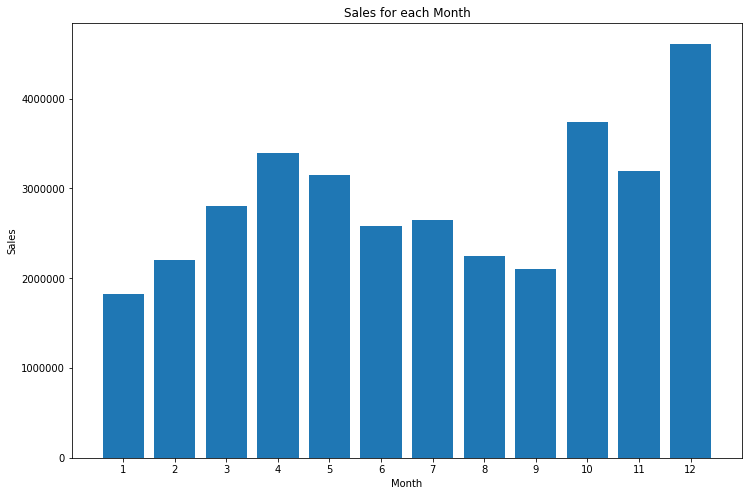

In [22]:
create_bar(x=month_sales.index, height=month_sales.values,
           xlabel='Month', ylabel='Sales', title='Sales for each Month',
           ticks=list(range(1, 13)))

## Answering to Question 1: The best month for sales was December.

## Question 2: What city sold the most products?

In [23]:
city_sales = df.groupby('city').sum()['final_price'].sort_values()

city_sales

city
Portland, ME         4.497583e+05
Austin, TX           1.819582e+06
Portland, OR         1.870732e+06
Seattle, WA          2.747755e+06
Dallas, TX           2.767975e+06
Atlanta, GA          2.795499e+06
Boston, MA           3.661642e+06
New York City, NY    4.664317e+06
Los Angeles, CA      5.452571e+06
San Francisco, CA    8.262204e+06
Name: final_price, dtype: float64

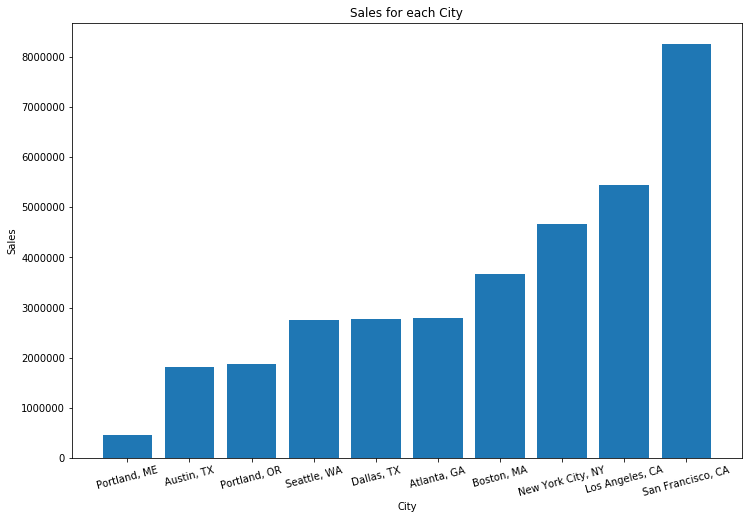

In [24]:
create_bar(x=city_sales.index, height=city_sales.values,
           xlabel='City', ylabel='Sales', title='Sales for each City', rotation=15)

## Answering to Question 2: The city that sold most products was San Francisco, CA.

## Question 3: What was the best hour to display advertisements?

In [25]:
hour_count = df.groupby('hour').count()['Order ID']

hour_count[:5]

hour
0    3910
1    2350
2    1243
3     831
4     854
Name: Order ID, dtype: int64

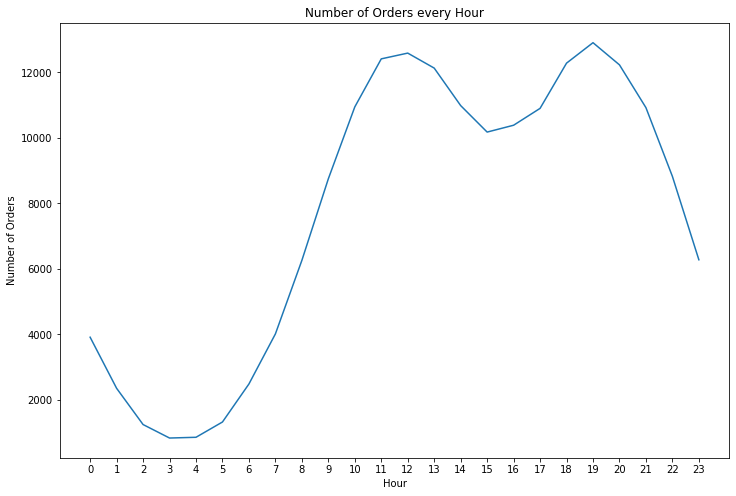

In [26]:
create_plot(x=hour_count.index, y=hour_count.values,
            xlabel='Hour', ylabel='Number of Orders', title='Number of Orders every Hour', 
            ticks=list(range(0, 24)))

## Answering to Question 3: The best hours to display advertisements were 11 A.M and 7 P.M.

## Question 4: What products are most often sold together?

In [27]:
df.duplicated(keep=False).sum()

528

In [28]:
df[df['Order ID'] == 178158]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,final_price,city
1681,178158,Google Phone,1,600.00,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,21,600.00,"San Francisco, CA"
1682,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,21,11.95,"San Francisco, CA"
1683,178158,Wired Headphones,1,11.99,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,21,11.99,"San Francisco, CA"
1684,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,21,11.95,"San Francisco, CA"


### Creating new data frame that will have the Order ID and all its Products.

In [29]:
df_products = df[df['Order ID'].duplicated(keep=False)]

df_products['Product'] = df_products.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_products = df_products[['Order ID', 'Product']].drop_duplicates()

df_products.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


### Getting the most 2 products that were sold together.

In [30]:
count = Counter()

for row in df_products['Product']:
    row_products = row.split(',')
    
    count.update(Counter(combinations(row_products, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Getting the most 3 products that were sold together.

In [31]:
count = Counter()

for row in df_products['Product']:
    row_products = row.split(',')
    
    count.update(Counter(combinations(row_products, 3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


## Answering to Question 4: The most 2 products were iPhone and Lightning Charging Cable. And the most 3 were Google Phone, USB-C Charging Cable and Wired Headphones.

## Question 5: Which product has the highest profit?

In [32]:
product_sales = df.groupby('Product')['final_price'].sum().sort_values()

product_sales

Product
AAA Batteries (4-pack)          92740.83
AA Batteries (4-pack)          106118.40
Wired Headphones               246478.43
USB-C Charging Cable           286501.25
Lightning Charging Cable       347094.15
LG Dryer                       387600.00
LG Washing Machine             399600.00
20in Monitor                   454148.71
Vareebadd Phone                827200.00
27in FHD Monitor              1132424.50
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Apple Airpods Headphones      2349150.00
34in Ultrawide Monitor        2355558.01
27in 4K Gaming Monitor        2435097.56
Google Phone                  3319200.00
ThinkPad Laptop               4129958.70
iPhone                        4794300.00
Macbook Pro Laptop            8037600.00
Name: final_price, dtype: float64

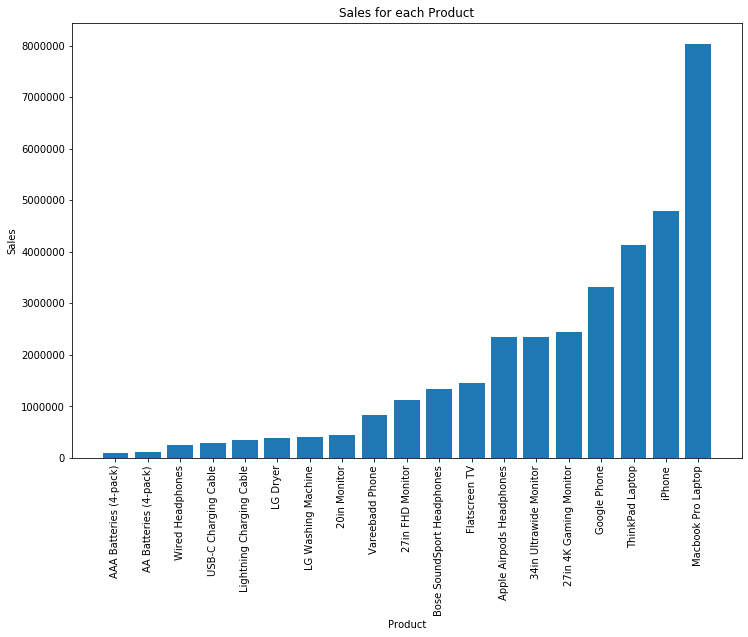

In [33]:
create_bar(x=product_sales.index, height=product_sales.values,
           xlabel='Product', ylabel='Sales', title='Sales for each Product', rotation=90)

## Answering to Question 5: It was Macbook Pro Laptop
## Question 6: What product sold the most?

In [34]:
product_quantities = df.groupby('Product')['Quantity Ordered'].sum().sort_values()

product_quantities

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int64

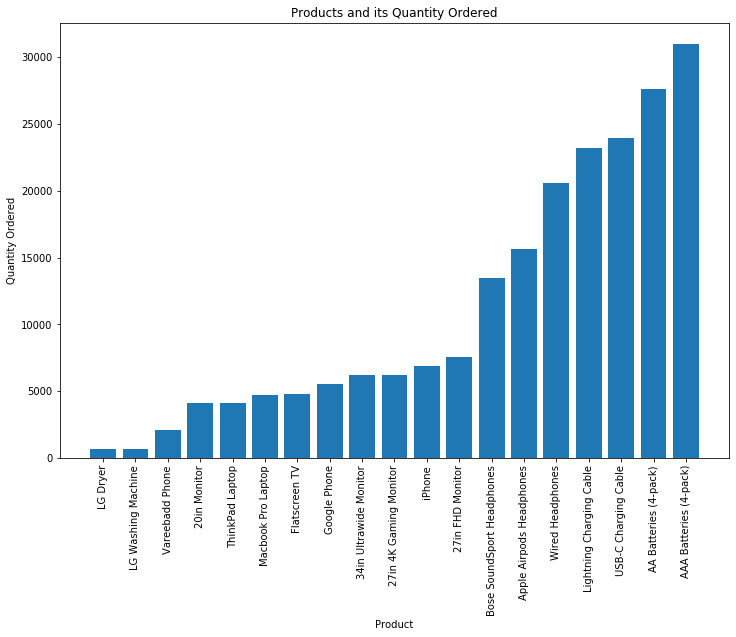

In [35]:
create_bar(x=product_quantities.index, height=product_quantities.values,
           xlabel='Product', ylabel='Quantity Ordered', title='Products and its Quantity Ordered', 
           rotation=90)

### Plotting the products with its price and its Quantity Ordered.

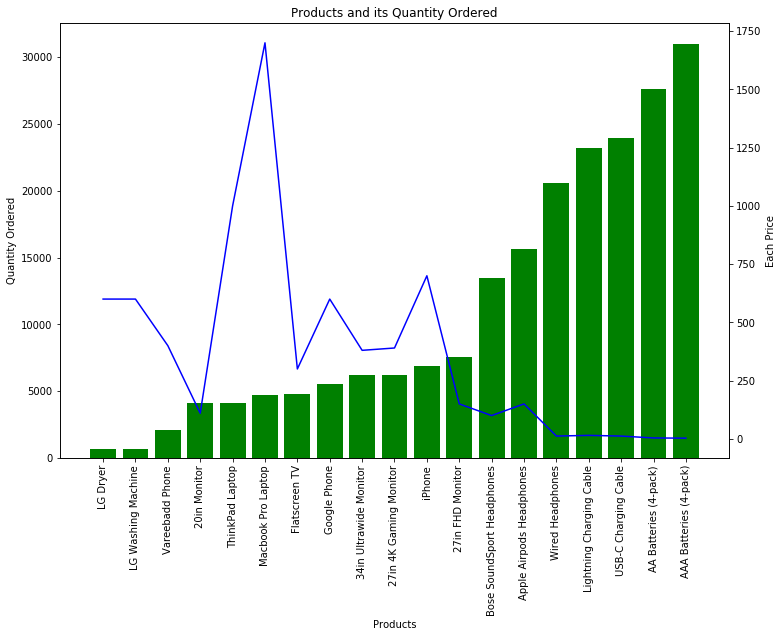

In [36]:
prices = df.groupby('Product').mean()['Price Each']
prices = prices.reindex(index=product_quantities.index)

fig, ax1 = plt.subplots(figsize=(12, 8));

ax2 = ax1.twinx();

ax1.bar(x=product_quantities.index, height=product_quantities.values, color='g');

ax1.set_xlabel('Products');
ax1.set_ylabel('Quantity Ordered');
ax1.set_title('Products and its Quantity Ordered');
ax1.set_xticklabels(product_quantities.index, rotation=90);

ax2.plot(product_quantities.index, prices, 'b');

ax2.set_ylabel('Each Price');

In [37]:
prices

Product
LG Dryer                       600.00
LG Washing Machine             600.00
Vareebadd Phone                400.00
20in Monitor                   109.99
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Flatscreen TV                  300.00
Google Phone                   600.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
iPhone                         700.00
27in FHD Monitor               149.99
Bose SoundSport Headphones      99.99
Apple Airpods Headphones       150.00
Wired Headphones                11.99
Lightning Charging Cable        14.95
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

## Answering to Question 6: It was AAA Batteries (4-pack). and I think that's because it's the cheapest product of all products.